## Time Series Analysis
------------------------------------

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_excel('Superstore.xls')

In [12]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60
1,2,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
2,3,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
3,4,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
4,5,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71


In [13]:
df.shape

(10000, 20)

In [14]:
f_sales = df.loc[df['Category']=='Furniture']

In [15]:
f_sales.shape

(1501, 20)

In [16]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10000988,Office Supplies,Storage,"Fellowes Folders, Blue",79.20,3,0.0,39.60
1,2,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004144,Technology,Accessories,"SanDisk Numeric Keypad, Bluetooth",388.92,7,0.0,0.00
2,3,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-LA-10001915,Office Supplies,Labels,"Avery Legal Exhibit Labels, 5000 Label Set",35.19,3,0.0,16.11
3,4,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,OFF-ST-10004550,Office Supplies,Storage,"Fellowes Folders, Wire Frame",50.94,2,0.0,13.20
4,5,ES-2017-1311038,2017-02-07,2017-02-11,Standard Class,AS-10045,Aaron Smayling,Corporate,Leeds,England,United Kingdom,North,TEC-AC-10004068,Technology,Accessories,"Memorex Memory Card, USB",307.44,3,0.0,73.71


We want to forecast the sales of future , we will be focusing on data and sales

In [17]:
f_sales.shape

(1501, 20)

In [18]:
f_sales['Order Date'].min()

Timestamp('2014-01-03 00:00:00')

In [19]:
f_sales['Order Date'].max()

Timestamp('2017-12-31 00:00:00')

our data set contains 4 years of furniture data

## Data Preprocessing

As we are predicting the future sales of furniture , we need orderdate and sales

In [20]:
df_furniture = f_sales[['Order Date','Sales']]

In [21]:
df_furniture


,Order Date,Sales
21,2017-06-18,268.164
54,2017-07-03,854.280
58,2016-07-17,214.848
64,2017-08-14,221.292
70,2014-04-01,2624.040
...,...,...
9956,2017-08-28,212.400
9976,2015-08-17,155.880
9980,2014-08-28,267.360
9990,2017-02-07,429.480


In [22]:
df_furniture = df_furniture.sort_values('Order Date')

In [23]:
df_furniture.head()

,Order Date,Sales
6090,2014-01-03,854.490
4645,2014-01-06,324.450
6570,2014-01-07,155.358
5615,2014-01-08,986.904
7779,2014-01-11,1384.290


In [24]:
df_furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [25]:
df_furniture.groupby('Order Date')['Sales']

In [26]:
df_furniture.groupby('Order Date')['Sales'].sum()

Order Date
2014-01-03     854.4900
2014-01-06     324.4500
2014-01-07     155.3580
2014-01-08     986.9040
2014-01-11    1652.2740
                ...    
2017-12-25     380.6340
2017-12-26    2117.5830
2017-12-29    2567.4450
2017-12-30    1241.1315
2017-12-31     245.1600
Name: Sales, Length: 776, dtype: float64

The groupby method groups the DataFrame by the 'Order Date' column. The sum method then aggregates the 'Sales' for each date.

In [27]:
df_furniture = df_furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [28]:
df_furniture

,Order Date,Sales
0,2014-01-03,854.4900
1,2014-01-06,324.4500
2,2014-01-07,155.3580
3,2014-01-08,986.9040
4,2014-01-11,1652.2740
...,...,...
771,2017-12-25,380.6340
772,2017-12-26,2117.5830
773,2017-12-29,2567.4450
774,2017-12-30,1241.1315


<Figure size 1000x600 with 0 Axes>

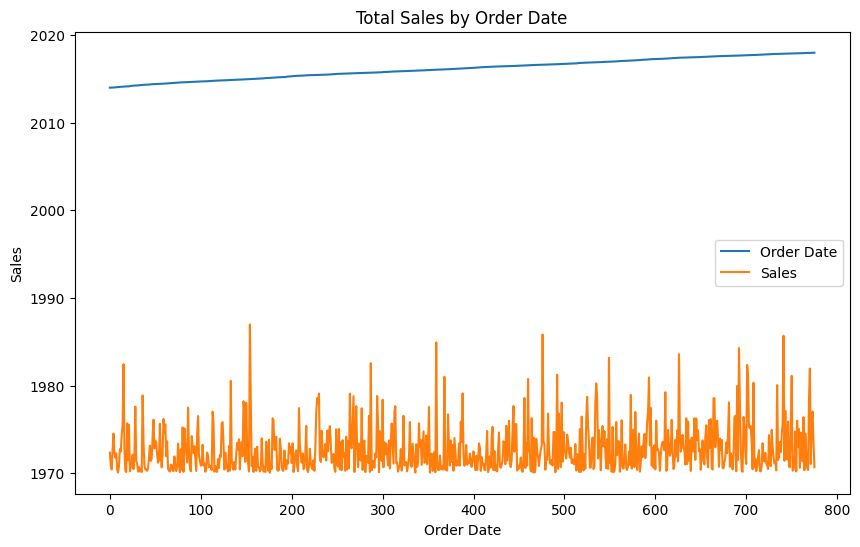

In [29]:
plt.figure(figsize=(10, 6))
df_furniture.plot()
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.title('Total Sales by Order Date')
plt.show()

In [30]:
sales_min_by_date = df_furniture.groupby('Order Date')['Sales'].min()

In [31]:
sales_min_by_date

Order Date
2014-01-03     854.4900
2014-01-06     324.4500
2014-01-07     155.3580
2014-01-08     986.9040
2014-01-11    1652.2740
                ...    
2017-12-25     380.6340
2017-12-26    2117.5830
2017-12-29    2567.4450
2017-12-30    1241.1315
2017-12-31     245.1600
Name: Sales, Length: 776, dtype: float64

## we want to create index as date

In [32]:
df_furniture=df_furniture.set_index('Order Date')
df_furniture.head()

,Sales
Order Date,
2014-01-03,854.490
2014-01-06,324.450
2014-01-07,155.358
2014-01-08,986.904
2014-01-11,1652.274


## Resampling the data

Downsampling: decreasing the frequency of sampling

minutes to seconds

upsampling: increasing the frequency of sampling

basis of months and seconds

additional structure

having daily data but want to predict the monthly

In [33]:
y = df_furniture['Sales'].resample('MS').mean()

In [34]:
y

Order Date
2014-01-01     613.792364
2014-02-01    1380.977700
2014-03-01     633.646714
2014-04-01     832.138333
2014-05-01     739.923125
2014-06-01    1149.344600
2014-07-01     244.102333
2014-08-01     791.406176
2014-09-01     787.889333
2014-10-01     597.043071
2014-11-01     845.782765
2014-12-01    1542.838000
2015-01-01     484.777154
2015-02-01     646.094700
2015-03-01     702.754200
2015-04-01     756.329500
2015-05-01     717.183429
2015-06-01    1094.312348
2015-07-01     986.297500
2015-08-01    1152.946636
2015-09-01    1049.432609
2015-10-01    1028.266100
2015-11-01     901.471333
2015-12-01     849.506526
2016-01-01     898.896000
2016-02-01     860.303824
2016-03-01     936.972214
2016-04-01     612.922500
2016-05-01     625.579594
2016-06-01     956.231674
2016-07-01     892.155529
2016-08-01    1068.094957
2016-09-01    1218.546150
2016-10-01     530.335050
2016-11-01    1382.675714
2016-12-01    1110.486083
2017-01-01     812.868000
2017-02-01     993.128357
2

### now the data is month wise

## visualizing the furniture time series data


<Axes: xlabel='Order Date'>

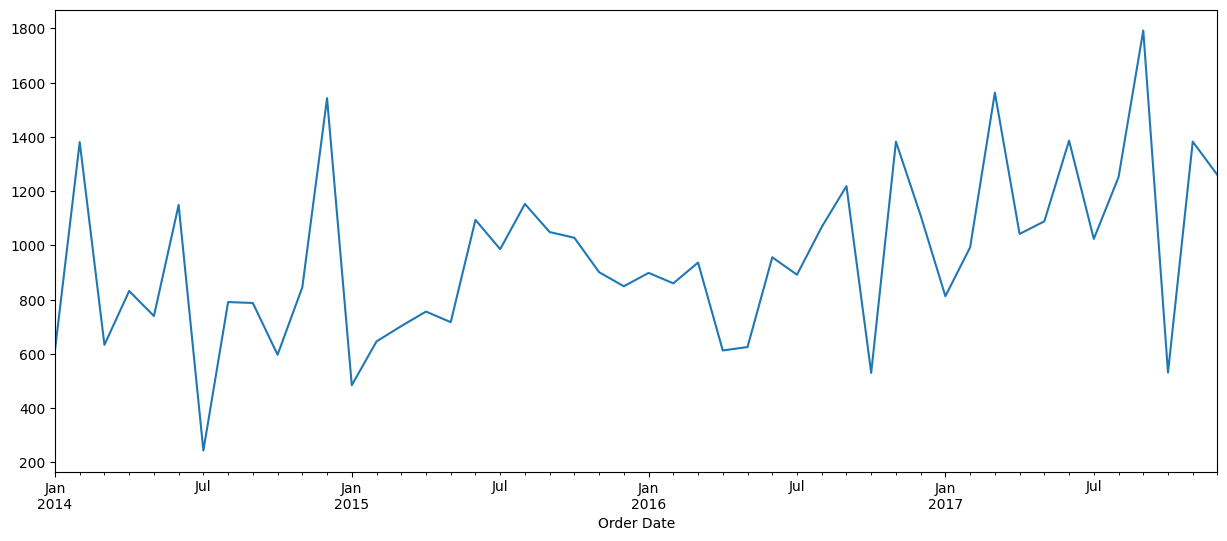

In [35]:
y.plot(figsize=(15,6))

##
* If we observe December upward

*we can also visualize the data using Decomposing method

* trend , seasonality

RC parameters :  change the

In Matplotlib, rcParams (runtime configuration parameters) are used to customize the appearance and behavior of plots. These parameters can be set globally or temporarily to change the default styles, such as figure size, line width, font size, etc.

print

In [36]:
print(plt.rcParams['figure.figsize'])

[10.0, 6.0]


In [37]:
plt.rcParams['figure.figsize']=(10,6)

Useful abstraction for selecting the forecasting method is by breakdown the data into systematic and unsystematic components

To check different components of dataset we need to decompose the data



Systematic components: Consistency and reccurrence of data

* can be modelled

Level , Trends , seasonality

Level : avg value of series
Trends: increase or decreasing values in the series
seasonality : repeating short term cycle in the series
* winter season

Noise : random variation in the series

these can be combined additively or multplicatively

additively : y(t) = level + trend+season + noise

UnSystematic components: Cannot be modelled

In [38]:
import statsmodels.api as sm

In [39]:
decomposition = sm.tsa.seasonal_decompose(y,'additive')

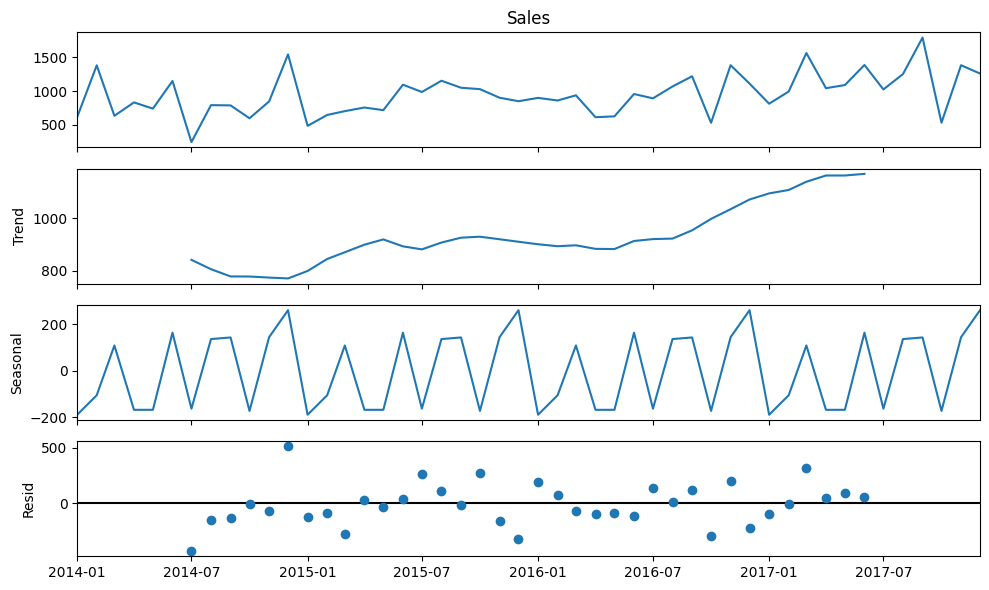

In [40]:
figure=decomposition.plot()
plt.show()

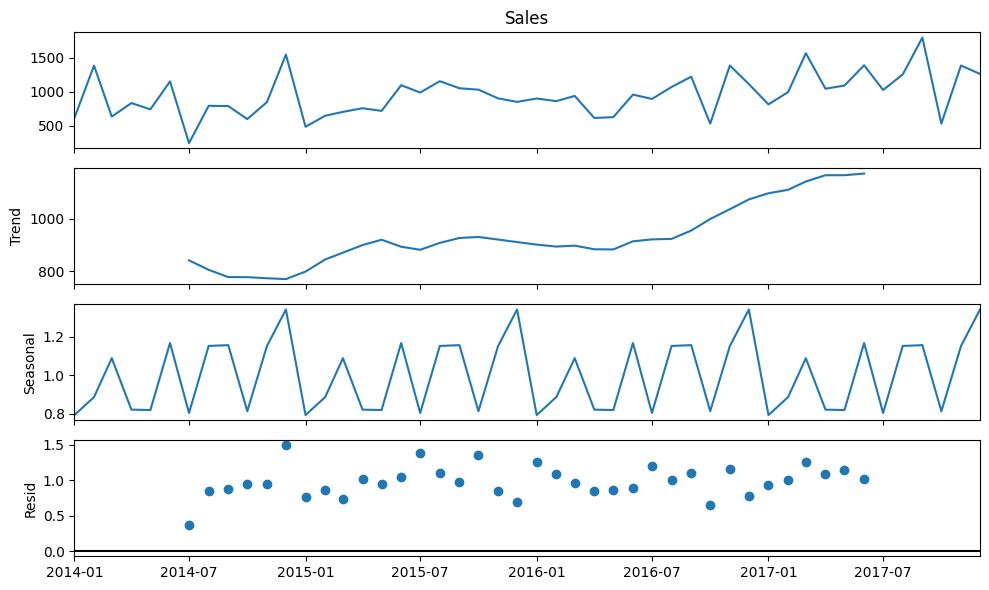

In [41]:
decomposition = sm.tsa.seasonal_decompose(y,'multiplicative')
fig=decomposition.plot()
plt.show()

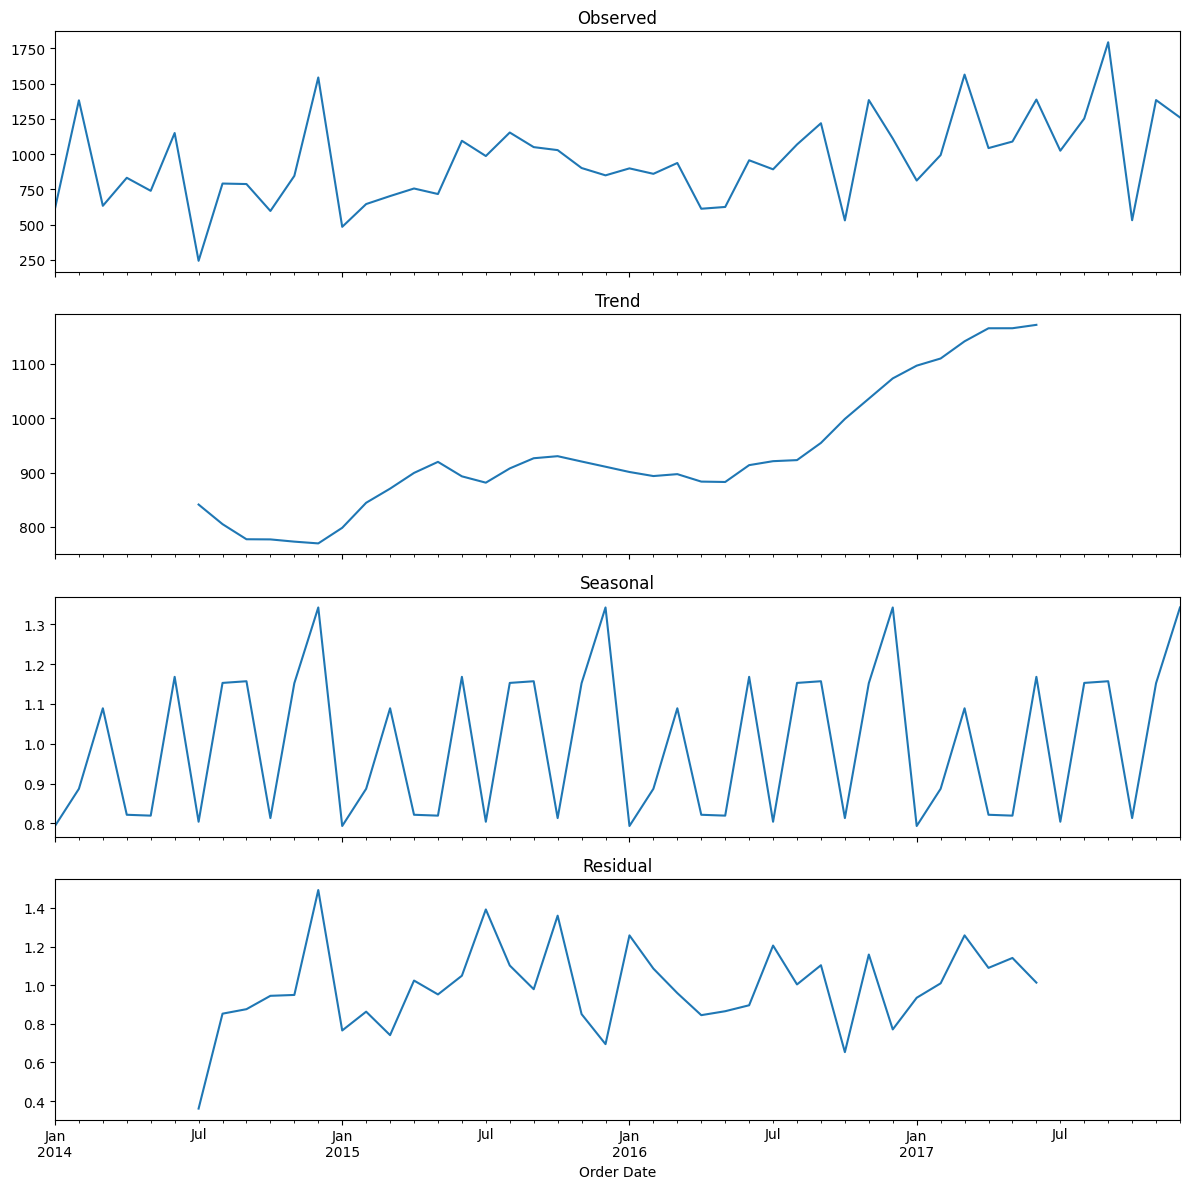

In [42]:
# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12), sharex=True)
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()

In [43]:
from sklearn.model_selection import train_test_split

# Split the data
train, test = train_test_split(df_furniture['Sales'], test_size=0.2, shuffle=False)

print("Train set length:", len(train))
print("Test set length:", len(test))


Train set length: 620
Test set length: 156


## ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a popular time series forecasting model. The ARIMA model is defined by three parameters: pp, dd, and qq. These parameters account for the autoregressive (AR) part, the differencing (I) part, and the moving average (MA) part of the model, respectively.
Understanding the Parameters

    p (AutoRegressive part): This parameter specifies the number of lag observations included in the model (i.e., the number of past values to consider).
    d (Integrated part): This parameter specifies the number of times the raw observations are differenced to make the time series stationary.
    q (Moving Average part): This parameter specifies the size of the moving average window (i.e., the number of lagged forecast errors to include in the model).

In [44]:
import itertools

p=d=q= range(0,2)

print(p,d,q)

range(0, 2) range(0, 2) range(0, 2)


In [45]:
pdq = list(itertools.product(p,d,q))

In [46]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [47]:
seasonal_pdq = [(x[0],x[1],x[2],12)for x in list(itertools.product(p,d,q))]
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [48]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # (p, d, q) - you may need to tune these parameters
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                  620
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5160.862
Date:                Fri, 24 May 2024   AIC                          10333.724
Time:                        16:52:31   BIC                          10360.292
Sample:                             0   HQIC                         10344.052
                                - 620                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7817      0.038    -20.457      0.000      -0.857      -0.707
ar.L2         -0.6060      0.046    -13.269      0.000      -0.695      -0.516
ar.L3         -0.4665      0.053     -8.883      0.0

In [77]:
model_fit.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
ar.L1,-0.7817,0.038,-20.457,0.000,-0.857,-0.707
ar.L2,-0.6060,0.046,-13.269,0.000,-0.695,-0.516
ar.L3,-0.4665,0.053,-8.883,0.000,-0.569,-0.364
ar.L4,-0.2847,0.051,-5.594,0.000,-0.384,-0.185
ar.L5,-0.1842,0.042,-4.389,0.000,-0.266,-0.102
sigma2,1.026e+06,3.61e+04,28.403,0.000,9.55e+05,1.1e+06


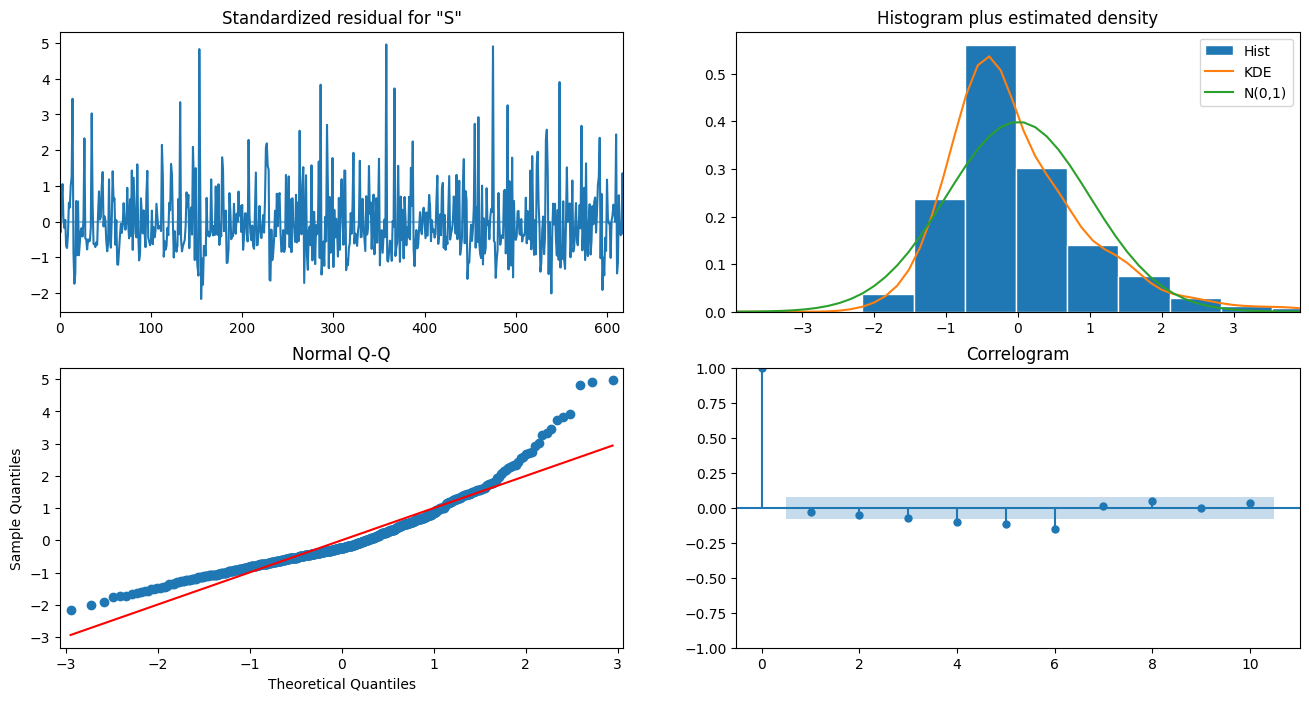

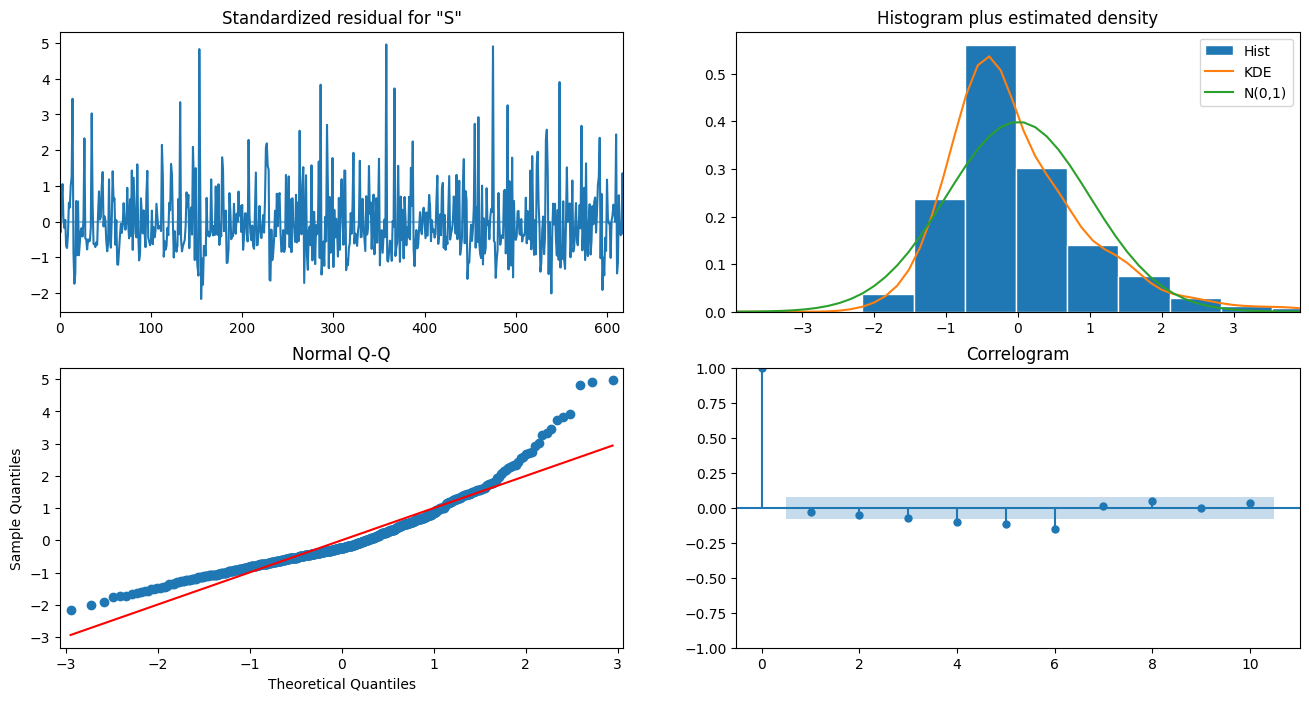

In [79]:
model_fit.plot_diagnostics(figsize=(16,8))

The model residuals are normally distributed.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


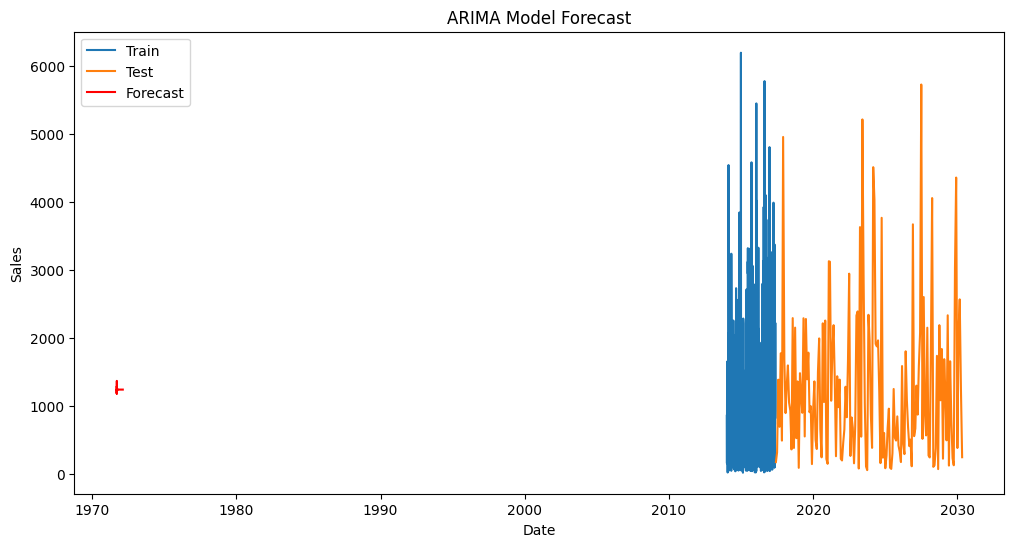

In [49]:
# Make predictions
forecast = model_fit.forecast(steps=len(test))
test.index = pd.date_range(start=train.index[-1], periods=len(test), freq='M')  # Adjust the frequency as needed

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Forecast', color='red')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Code to compare sales of two supplies

## Office and furniture supplies sales comparision


In [50]:
f_sales = df.loc[df['Category']=='Furniture']
ofc_sales = df.loc[df['Category']=='Office Supplies']

In [51]:
df['Category'].unique()

array(['Office Supplies', 'Technology', 'Furniture'], dtype=object)

In [52]:
df_furniture = f_sales[['Order Date','Sales']]
df_ofc = ofc_sales[['Order Date','Sales']]

In [53]:
df_furniture.shape

(1501, 2)

In [54]:
df_ofc.shape

(6589, 2)

In [55]:
df_furniture = df_furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [56]:
df_ofc = df_ofc.groupby('Order Date')['Sales'].sum().reset_index()

In [57]:
# Convert SeriesGroupBy objects back to DataFrames
df_furniture = df_furniture.reset_index()
df_ofc = df_ofc.reset_index()



In [58]:
df_furniture.head()

,index,Order Date,Sales
0,0,2014-01-03,854.490
1,1,2014-01-06,324.450
2,2,2014-01-07,155.358
3,3,2014-01-08,986.904
4,4,2014-01-11,1652.274


In [59]:
df_ofc.head()

,index,Order Date,Sales
0,0,2014-01-01,44.865
1,1,2014-01-04,183.420
2,2,2014-01-05,296.670
3,3,2014-01-07,754.455
4,4,2014-01-08,115.800


In [60]:
furniture = df_furniture.set_index('Order Date')
office = df_ofc.set_index('Order Date')

In [61]:
y_furniture = furniture['Sales'].resample('MS').mean()

In [62]:
y_ofc  = office['Sales'].resample('MS').mean()

In [63]:
fur = pd.DataFrame({'Order Date':y_furniture.index,'Sales':y_furniture.values})
ofc = pd.DataFrame({'Order Date':y_ofc.index,'Sales':y_ofc.values})

In [64]:
store = fur.merge(ofc,how='inner',on='Order Date')

In [65]:
store.head()

,Order Date,Sales_x,Sales_y
0,2014-01-01,613.792364,403.408950
1,2014-02-01,1380.977700,291.369214
2,2014-03-01,633.646714,398.932625
3,2014-04-01,832.138333,584.416565
4,2014-05-01,739.923125,712.467947


In [66]:
store.rename(columns={'Sales_x':'furniture_sales','Sales_y':'ofc_sales'},inplace=True)

In [67]:
store.head()

,Order Date,furniture_sales,ofc_sales
0,2014-01-01,613.792364,403.408950
1,2014-02-01,1380.977700,291.369214
2,2014-03-01,633.646714,398.932625
3,2014-04-01,832.138333,584.416565
4,2014-05-01,739.923125,712.467947


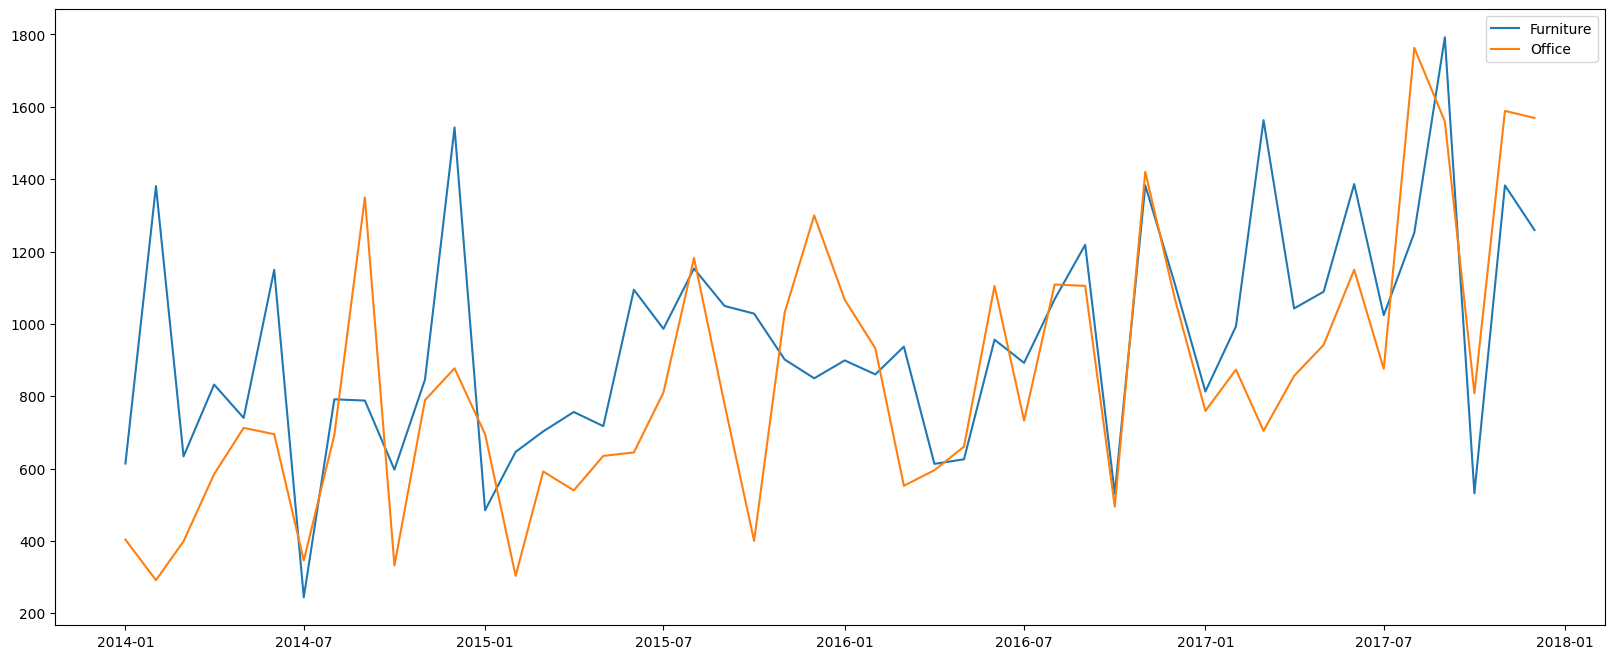

In [68]:
plt.figure(figsize=(20,8))
plt.plot(store['Order Date'],store['furniture_sales'],label='Furniture')
plt.plot(store['Order Date'],store['ofc_sales'],label='Office')
plt.legend()
plt.show()

In [69]:
first_date = store.loc[np.min(list(np.where(store['ofc_sales'] > store['furniture_sales']))),'Order Date']

In [70]:
print('Office sales first time produced higher sales than furniture sales is on :',format(first_date.date()))

Office sales first time produced higher sales than furniture sales is on : 2014-07-01


## Facebook prophet library :

Facebook Prophet is a robust time series forecasting library developed by Facebook. It is particularly useful for handling time series data that have strong seasonal effects and several seasons of historical data. Prophet is designed to be easy to use and to produce high-quality forecasts with minimal parameter tuning.
Key Features of Facebook Prophet

    Automatic Detection of Seasonal Patterns: Handles daily, weekly, and yearly seasonality.
    Robust to Missing Data: Can handle missing data and large outliers.
    Flexible Model Configuration: Allows users to incorporate holidays and special events.
    Interactive Plots: Provides visualization of the forecast components.



In [71]:
!pip install prophet

In [72]:
from prophet import Prophet

In [73]:
furniture = fur.rename(columns={'Order Date':'ds','Sales':'y'})
fur_model = Prophet(interval_width=0.70)
fur_model.fit(furniture)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtttr5o4/b9x4dgdt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtttr5o4/bihai_ry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66456', 'data', 'file=/tmp/tmphtttr5o4/b9x4dgdt.json', 'init=/tmp/tmphtttr5o4/bihai_ry.json', 'output', 'file=/tmp/tmphtttr5o4/prophet_modelrllu2ijt/prophet_model-20240524165240.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:52:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:52:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [74]:
ofc_data = ofc.rename(columns={'Order Date':'ds','Sales':'y'})
ofc_model = Prophet(interval_width=0.70)
ofc_model.fit(ofc_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtttr5o4/tdm_35yg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphtttr5o4/e2cuye8t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75799', 'data', 'file=/tmp/tmphtttr5o4/tdm_35yg.json', 'init=/tmp/tmphtttr5o4/e2cuye8t.json', 'output', 'file=/tmp/tmphtttr5o4/prophet_modelaq_du4xx/prophet_model-20240524165240.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:52:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:52:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [75]:
fur_forecast = fur_model.make_future_dataframe(periods=36,freq='MS')
fur_forecast = fur_model.predict(fur_forecast)

ofc_forecast = ofc_model.make_future_dataframe(periods=36,freq='MS')
ofc_forecast = ofc_model.predict(ofc_forecast)


Text(0.5, 1.0, 'Furniture sales')

<Figure size 1800x600 with 0 Axes>

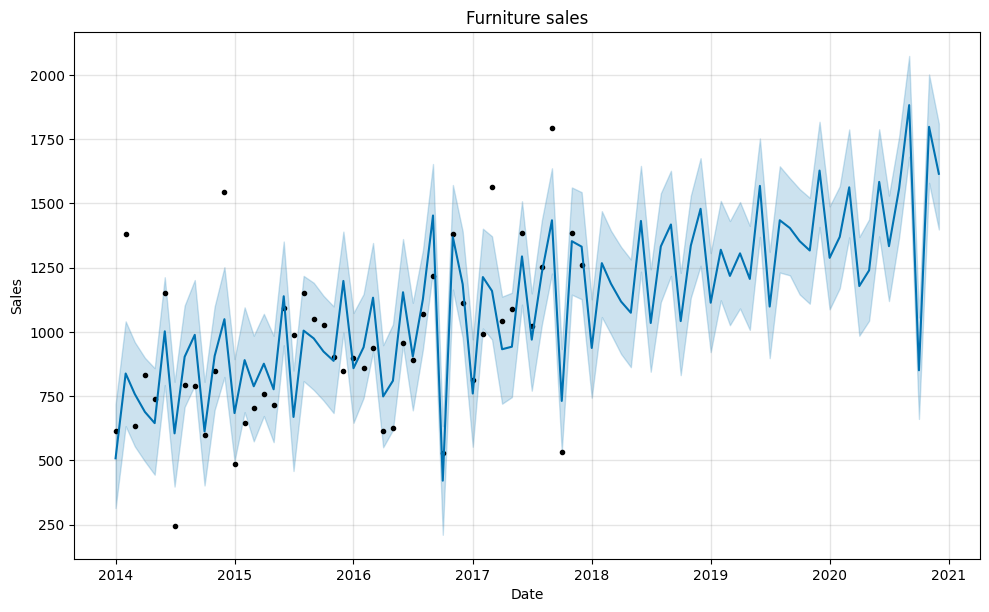

In [76]:
plt.figure(figsize=(18,6))
fur_model.plot(fur_forecast,xlabel='Date',ylabel='Sales')
plt.title('Furniture sales')